In [4]:
import pylab as plt
%matplotlib widget
np = plt.np
import os

In [89]:
str_in = open('output/fillapix_ortools.txt').read().split('\n')

ordict = {}
for i, line in enumerate(str_in):
    if 'grandgames' in line:
        key = line.strip()#.split('.net-')[1].split('.')[0]
        
        if 'grandgames' in str_in[i+1]:
            tm = 60*60*10
        else:
            tm = float(str_in[i+2].split(':')[1].split('s')[0])
            
        ordict[key] = tm

        
str_in = open('output/fillapix_purgeandmerge.txt').read().split('\n')
pamdict = {}
pamload = {}
for i, line in enumerate(str_in):
    if 'grandgames' in line:
        key = line.split(':')[1].strip()
    
    if 'Elapsed time:' in line:
        pamdict[key] = float(line.split(':')[1].strip())
        
    if 'Time to load the file:' in line:
        pamload[key] = float(line.split(':')[1].strip())
        
pamdict = {key:value for key, value in pamdict.items() if key in tmdict}


[j for i,j in pamload.items()][0:2]


[1.94489, 0.00380806]

In [50]:
'''
import os
files = [os.path.abspath('fillapix-collection/'+i) for i in os.listdir('fillapix-collection/')]
files.sort()
for file in files:
    if file not in tmdict:
        print(file)
'''

"\nimport os\nfiles = [os.path.abspath('fillapix-collection/'+i) for i in os.listdir('fillapix-collection/')]\nfiles.sort()\nfor file in files:\n    if file not in tmdict:\n        print(file)\n"

In [51]:
import seaborn

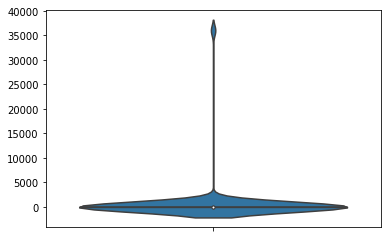

In [53]:
y = np.sort([value for _,value in tmdict.items()])
y2= np.sort([value for _,value in pamdict.items()])
seaborn.violinplot(x=None,#
                   y=y,
                   hue=None,
                   data=None,
                   order=None,
                   hue_order=None,
                   bw='scott',
                   cut=2,
                   scale='area',
                   scale_hue=True,
                   gridsize=100,
                   width=0.8,
                   inner='box',
                   split=True,
                   dodge=True,
                   orient=None,
                   linewidth=None,
                   color=None,
                   palette=None,
                   saturation=0.75,
                   ax=None,
                   #**kwargs
                  )

seaborn.violinplot(x=None,#
                   y=y2,
                   hue=None,
                   data=None,
                   order=None,
                   hue_order=None,
                   bw='scott',
                   cut=2,
                   scale='area',
                   scale_hue=True,
                   gridsize=100,
                   width=0.8,
                   inner='box',
                   split=True,
                   dodge=True,
                   orient=None,
                   linewidth=None,
                   color=None,
                   palette=None,
                   saturation=0.75,
                   ax=None,
                   #**kwargs
                  )

'''
ax = sns.violinplot(x="day", y="total_bill", hue="sex",
...                     data=tips, palette="Set2", split=True,
...                     scale="count")
''';

In [17]:
60*60*10

36000

70.17641005867549

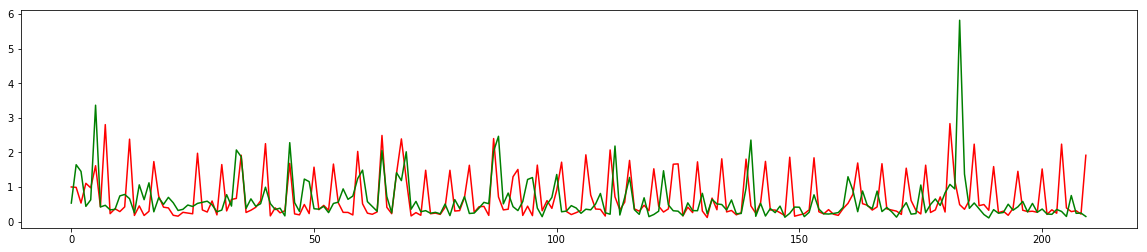

In [77]:
############################################33333
# Sudoku sterten
############################################33333
name = 'champagne'
sudoku_ort = [float(i.split('\n')[0][:-1]) for i in open('output/sudoku-'+name+'_ortools.txt').read().split('Solver time:')[1:]]
str_in = open('output/sudoku-'+name+'_purgeandmerge.txt').read().replace('Error tot time', 'Elapsed time:')
sudoku_pam_elap = [float(i.split('\n')[0]) for i in str_in.split('Elapsed time: ')[1:]]
sudoku_pam_load = [float(i.split('\n')[0]) for i in str_in.split('load the file: ')[1:]]


plt.figure(figsize=(20,4))
plt.plot(np.array(sudoku_ort)*50, 'r')
plt.plot(np.array(sudoku_pam_elap)#+sudoku_pam_load
         , 'g')


np.mean(np.array(sudoku_pam_elap)/sudoku_ort)

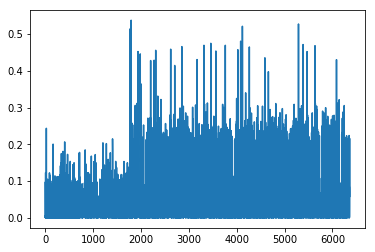

In [21]:
############################################33333
# Kakuro
############################################33333
str_in = open('output/kakuro_purgeandmerge.txt').read()
arr = np.array([float(i.split(':')[1].split('\n')[0].strip()) for i in str_in.split('\n') if 'Elapsed time:' in i])

plt.plot(arr)

<Figure size 864x288 with 0 Axes>

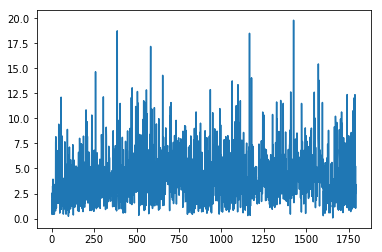

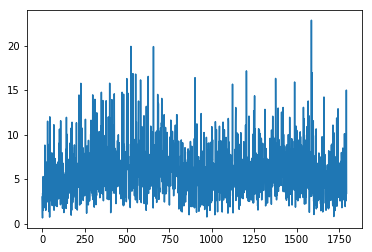

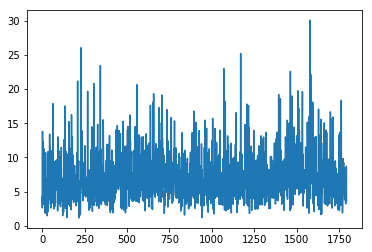

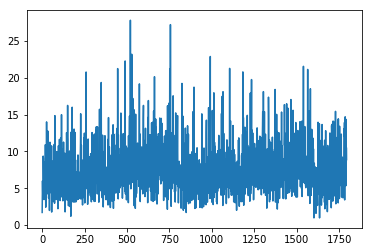

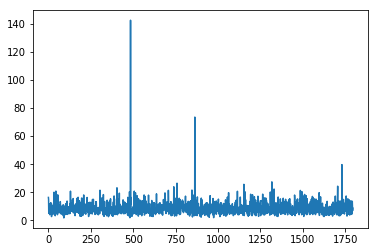

In [93]:
############################################33333
# Killer sudoku
############################################33333
import collections
from misc import dotdict
import sys
import pandas as pd

def params_to_arrays(paramdict):
    ret = dotdict()
    
    for key, val in paramdict.items():
        if not ret:
            ret['origkeys'] = []
            for k in val:
                ret[k] = []
        
        ret['origkeys'].append(key)
        for k, v in val.items():
            ret[k].append(v)
    
    return ret
        

def last_float(line):
    line = line.replace('s',' ').replace(':',' ')
    for i in line.split()[::-1]:
        try:
            return float(i)
        except: pass

f = open('output/killersudoku-krazydad-collection--emdw')


vals = collections.OrderedDict()

capture=np.inf
for i in range(sys.maxsize):
    line = f.readline()
    if not line: break
        
    if "File" in line:
        key = line.split('emdw/')[1].split('.')[0]
        vals[key] = dotdict()
        vals[key].filename = line.split()[-1]
        vals[key].difficulty = int(line.split('diff')[1].split('/')[0])
    
    if not vals: continue
    
    if not 'errtime' in vals[key]:
        vals[key].errtime = np.nan
    if 'err' in line and 'time' in line:
        vals[key].errtime = last_float(line)
       
    if 'Elapsed time' in line:
        vals[key].solvetime = last_float(line)
        capture=-1
    
    capture+=1
    if not 'solution' in vals[key]:
        vals[key].solution = ''
    if capture >=1 and capture <= 9:
        vals[key].solution += line
        
p = pd.DataFrame(dict(key=i, **j) for i,j in vals.items())

plt.figure(figsize=[12,4])

for i in range(1,6):
    plt.figure()
    plt.plot(np.array(p[p.difficulty==i].solvetime))
